<a href="https://colab.research.google.com/github/katrinag2004/ds3001assignments/blob/main/knnandvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/ds4e/knn
! git clone https://github.com/ds4e/visualization

Cloning into 'knn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 63 (delta 16), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (63/63), 24.29 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (35/35), 7.16 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q0.**

**What is the difference between regression and classification?**
Regression is predicting a numeric or continuous value, like sales. Classification is predicting the most likely category for a categorical outcome, such as vehicle type.

**What is a confusion table? What does it help us understand about a model's performance?
What does the SSE quantify about a particular model?**

To better assess a classifier's performance, we can use a Confusion Matrix to compare predicted and actual values, revealing patterns in correct and incorrect predictions.

**What are overfitting and underfitting?**

Underfitting happens when a model is too simple to capture the underlying pattern of the data, while overfitting occurs when a model is too complex and captures noise instead of the true pattern.


**Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or SSE on the test set, improve model performance?**
Training helps a model learn patterns in data to make predictions. Splitting data simulates future uncertainty by testing the model on unseen examples. This validates performance and guides model selection with techniques like cross-validation and bootstrapping.

**With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**

With classification, predicting a class label is simple and easy to interpret but doesn’t show confidence. Predicting a probability distribution reveals confidence levels, though it’s more complex and may need a decision threshold.



**Q1.**

 **Are there any NA's to handle?**

No

 **What patterns do you notice as you increase k? Determine the optimal
 for these data.
Describe what happened in the plots of predicted versus actual prices as
 varied**

Low k (e.g., 1 or 2): Model overfits, capturing noise with high variance and high test MSE; scatterplot points are widely scattered.
Increasing k: Model smooths out, reducing variance but risking underfitting if too large; scatterplot points cluster around a line.
Optimal k: Minimizes test set MSE, balancing underfitting and overfitting for the best generalization to new data.


       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


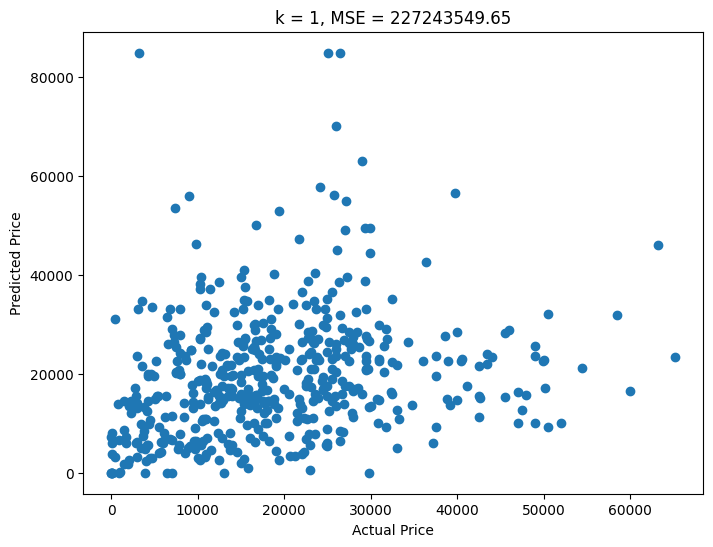

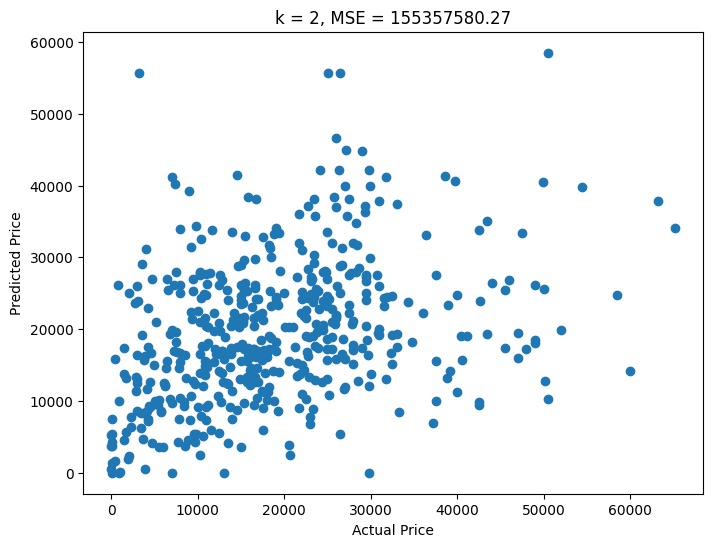

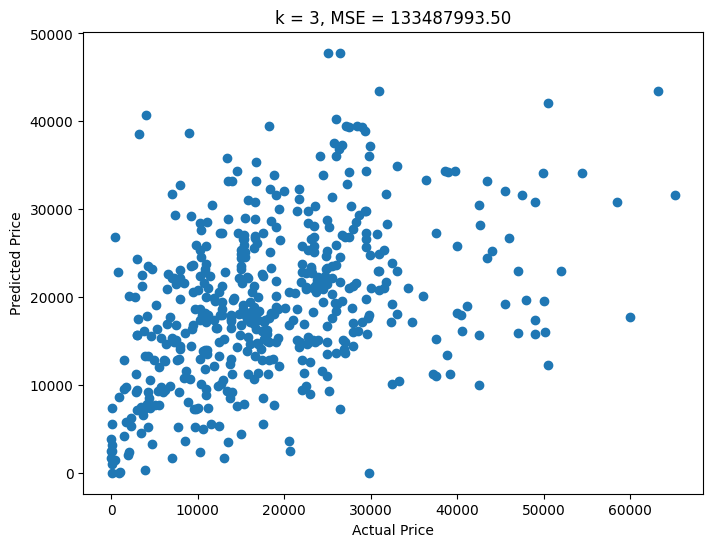

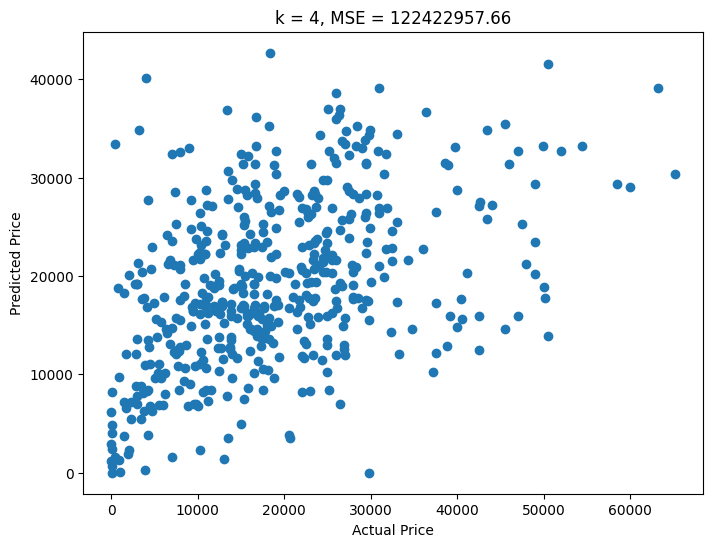

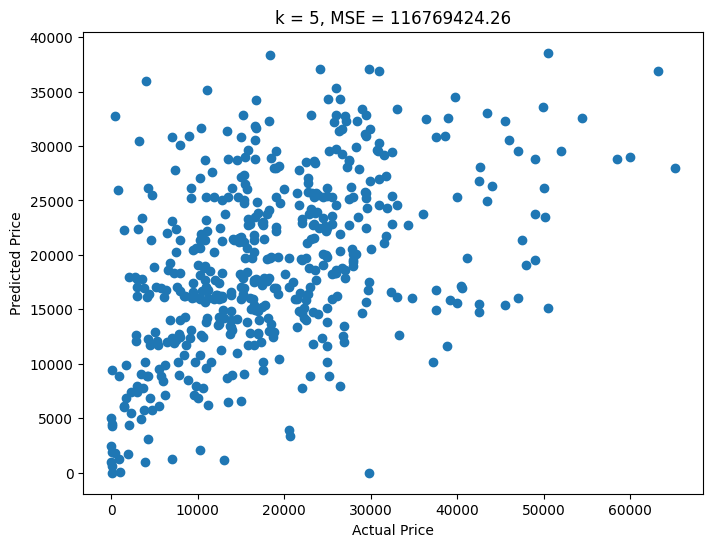

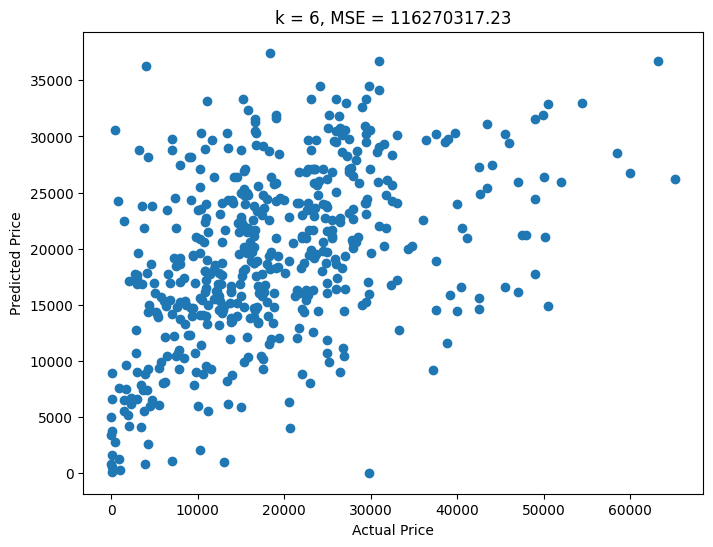

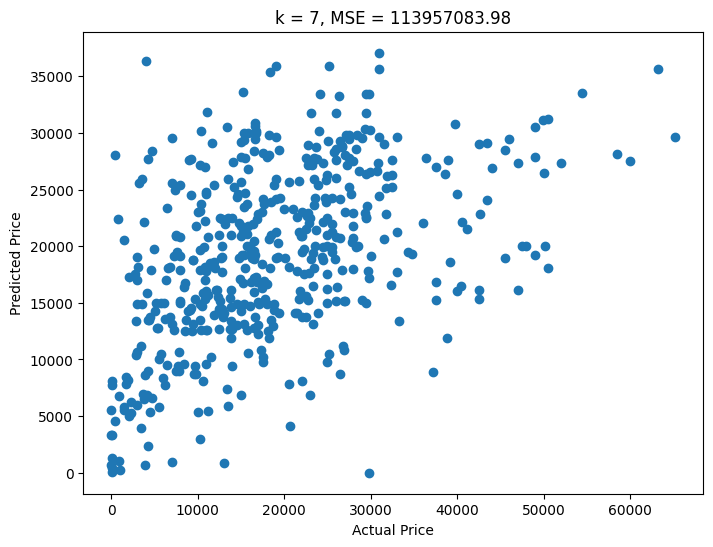

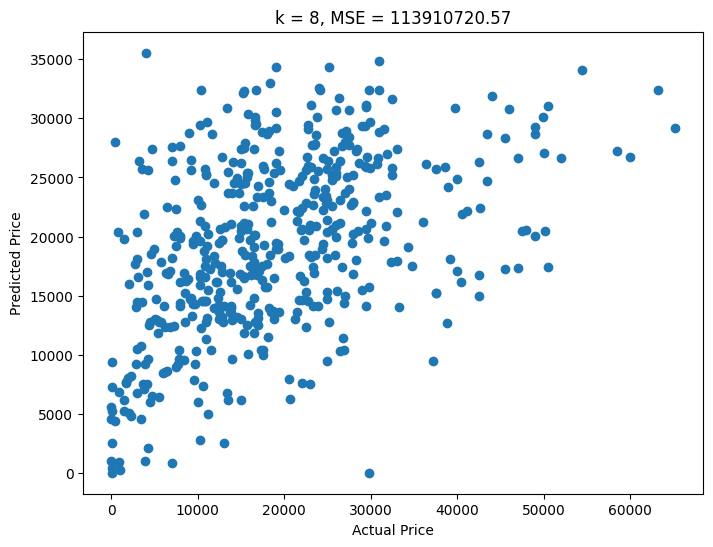

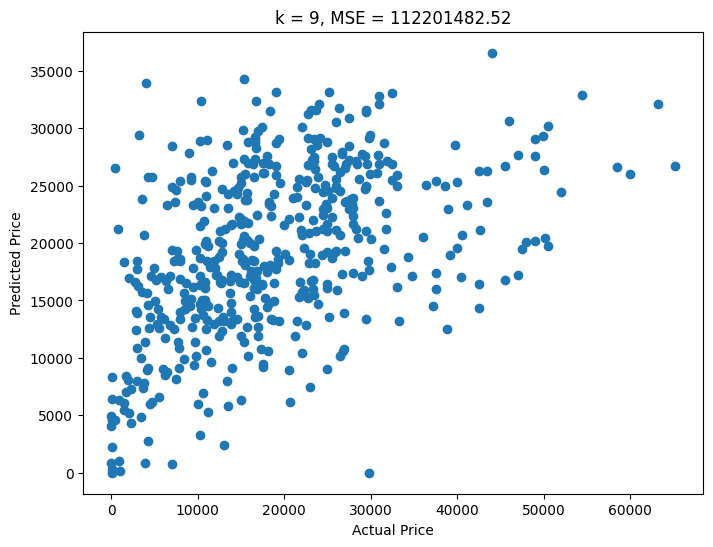

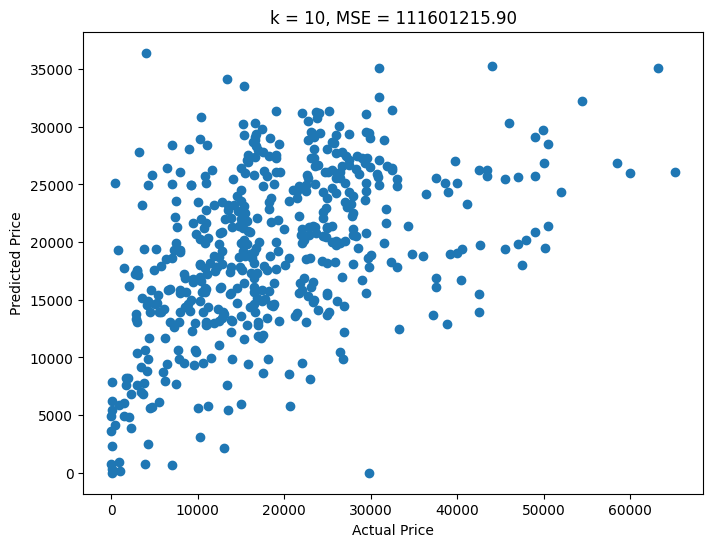

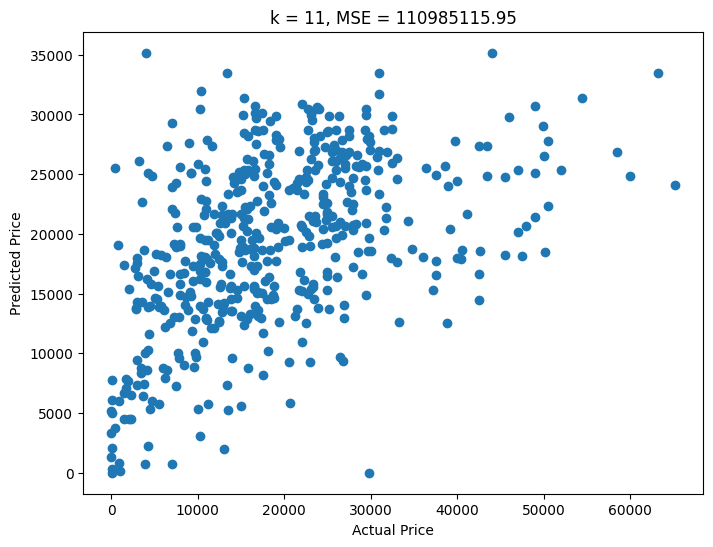

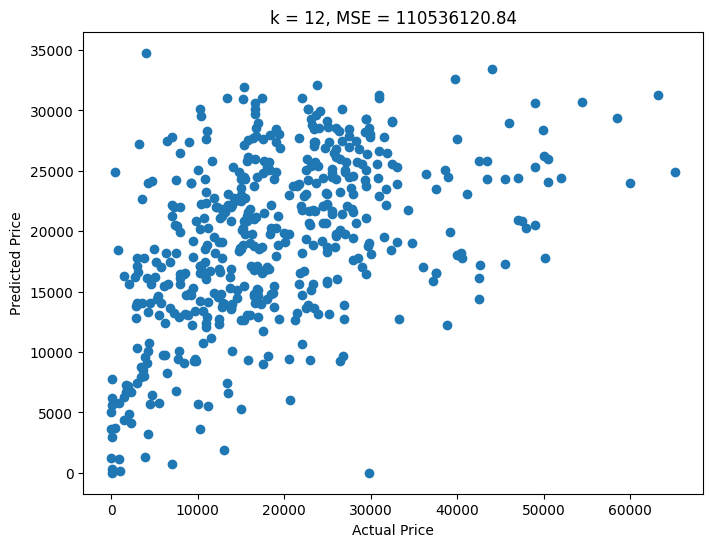

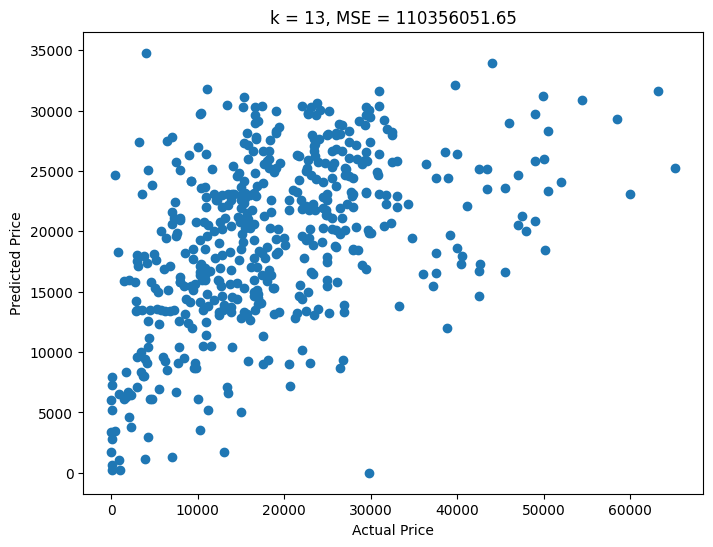

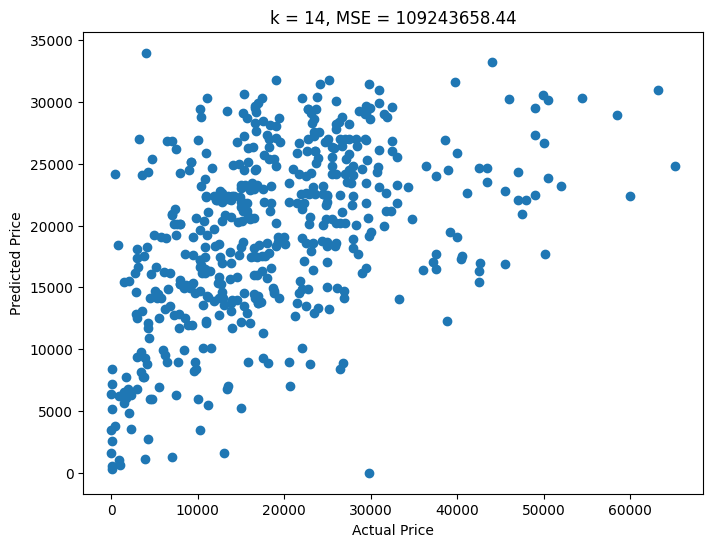

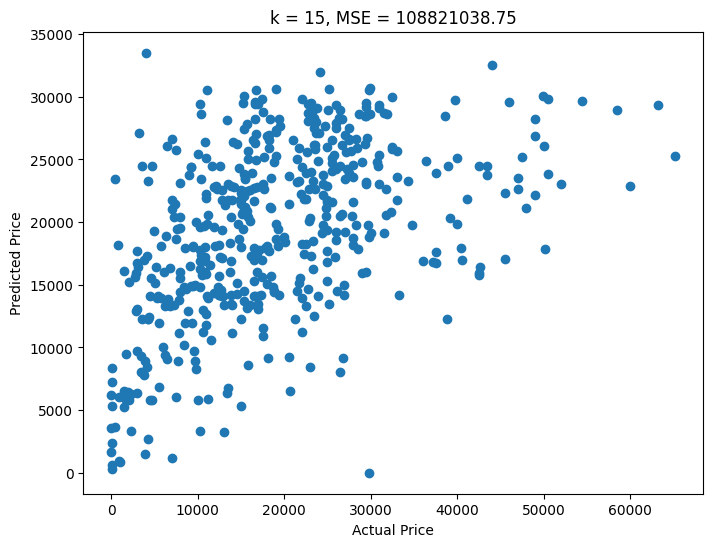

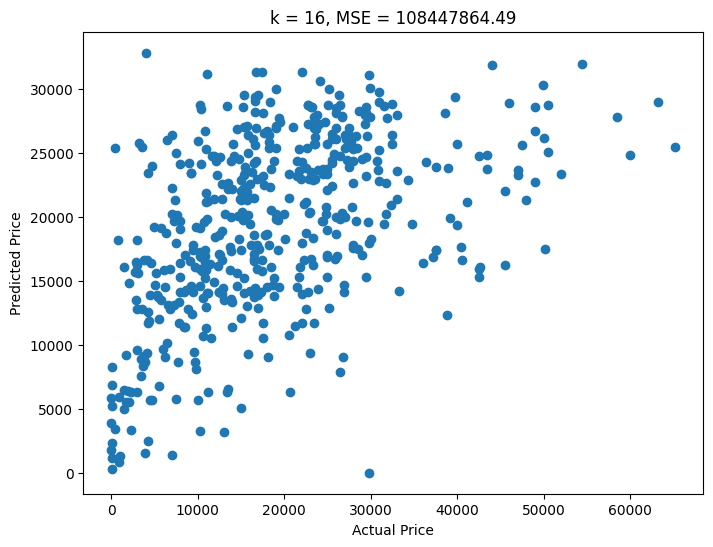

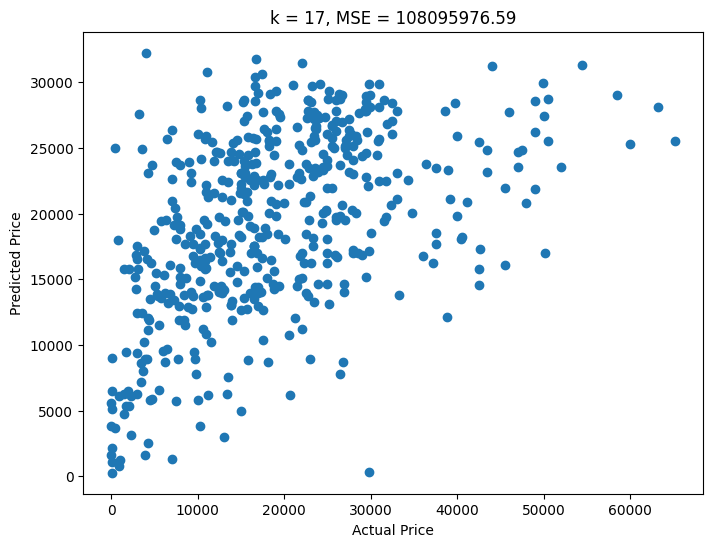

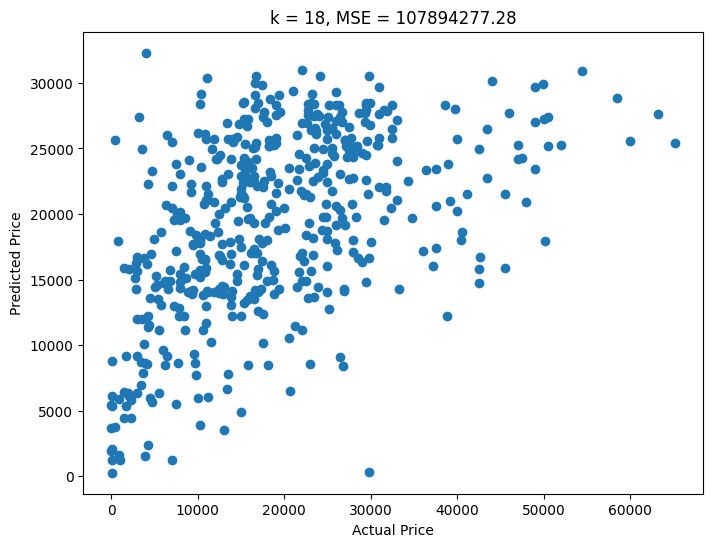

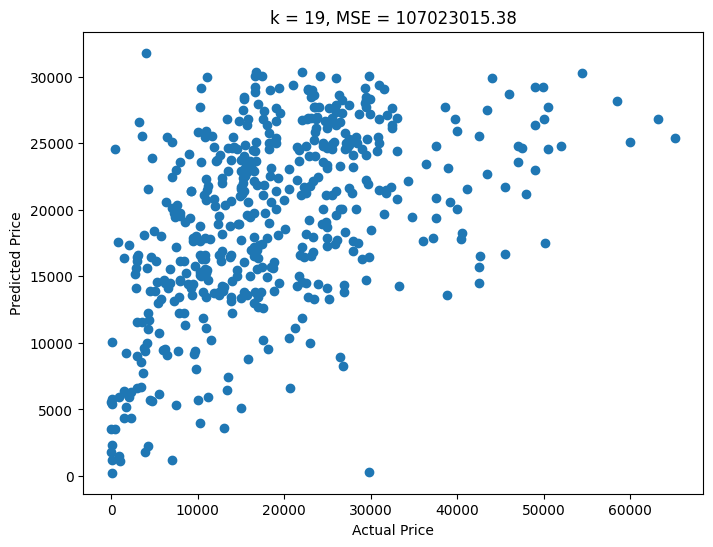

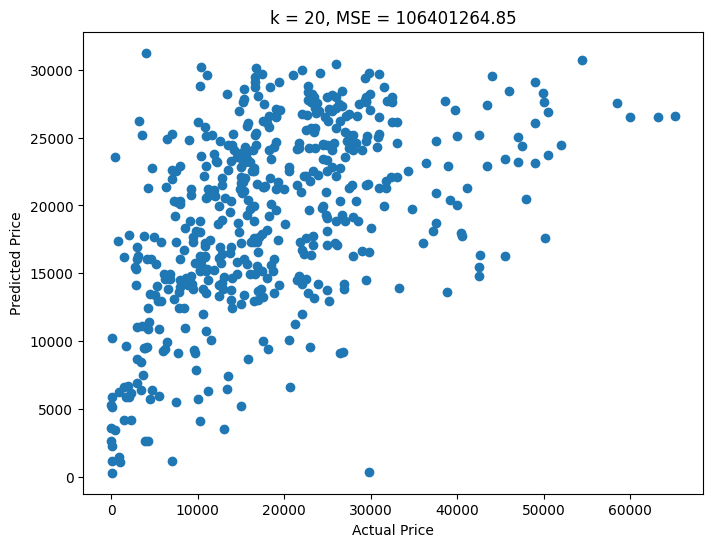

Optimal k: 20


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler

df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
df.head()

y = df['price'] # Create target variable vector
X = df.loc[:,['year','mileage']] # Create feature matrix

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  # Normalize X and keep column names


# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())
k=3
model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X,y) # Train the model on our data
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors

mse_values = []
for k in range(1, 21):  # Try k values from 1 to 20
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.show()

# Find optimal k:
optimal_k = np.argmin(mse_values) + 1  # Add 1 because k starts from 1
print(f"Optimal k: {optimal_k}")



**What are are the dimensions of the data?**
5 rows × 63 columns

**How many observations are there?**
3978

**What are the variables included?**
index	unitid	chronname	city	state	level	control	basic	hbcu	flagship	...	vsa_grad_after6_transfer	vsa_grad_elsewhere_after6_transfer	vsa_enroll_after6_transfer	vsa_enroll_elsewhere_after6_transfer	similar	state_sector_ct	carnegie_ct	counted_pct	nicknames	cohort_size


**Cross tabulate control and level. Describe the patterns you see.**
many more private four year colleges than there are private two year colleges. More four year colleges than two year colleges.

**For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see.**

All plots are skewed heavily right , showing that the graduation rates are low.

**Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?**

2-year Private not-for-profit and 4-year Private not-for-profit institutions appear to have the best graduation rates


**Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?**

4-year private-not-for-profit has the best graduation rate

**Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.**

There are significant overlapping regions in aid distribution between public and private for-profit institutions, as well as between two-year and four-year colleges.

**Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?**
I see a positive loosely linear trend. For the graphs grouped by level and then control, it seems as though the colleges that offer the most aid (private not for profit four year colleges) also have the highest graduation rate. This suggests a correlation between aid and graduation rate.

control  Private for-profit  Private not-for-profit  Public
level                                                      
2-year                  465                      68     926
4-year                  527                    1180     632


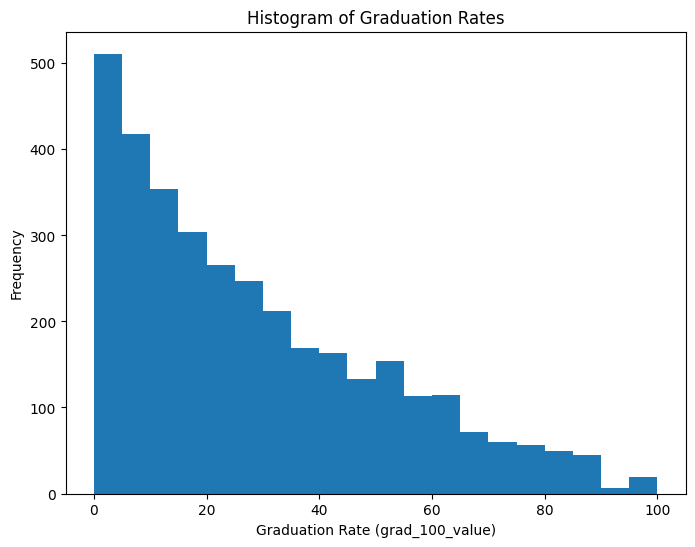

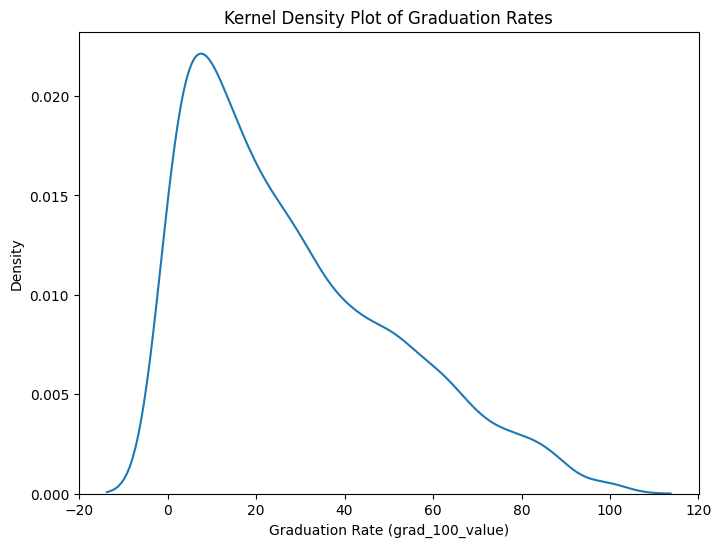

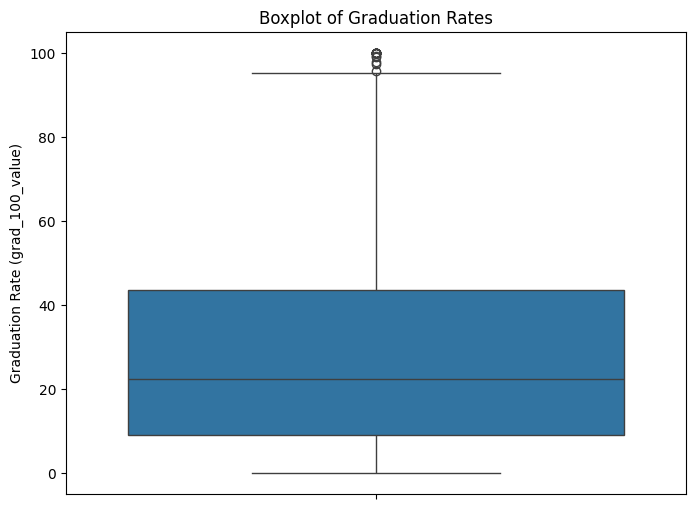

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64
                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-prof

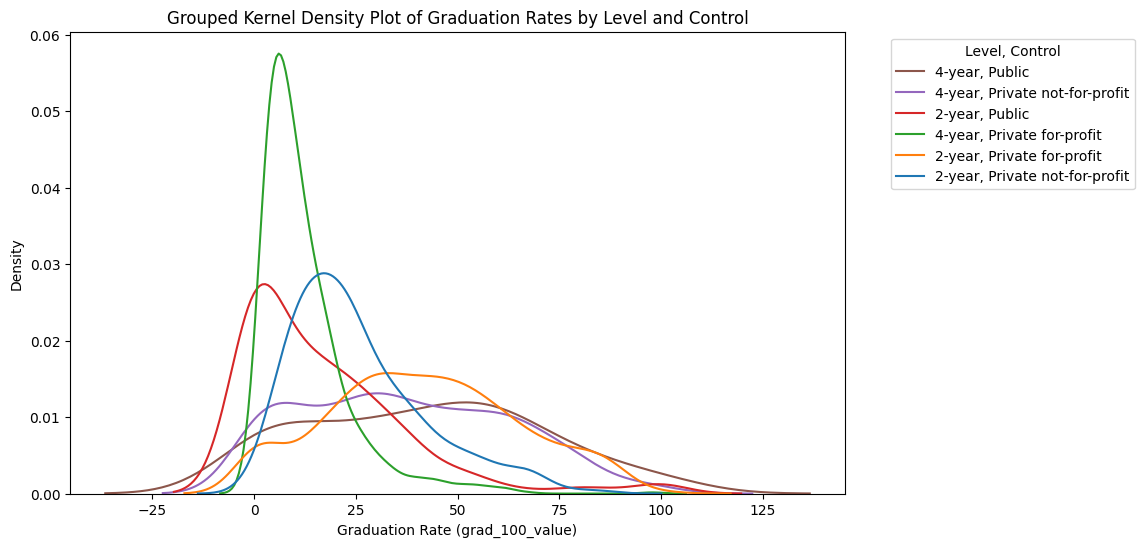

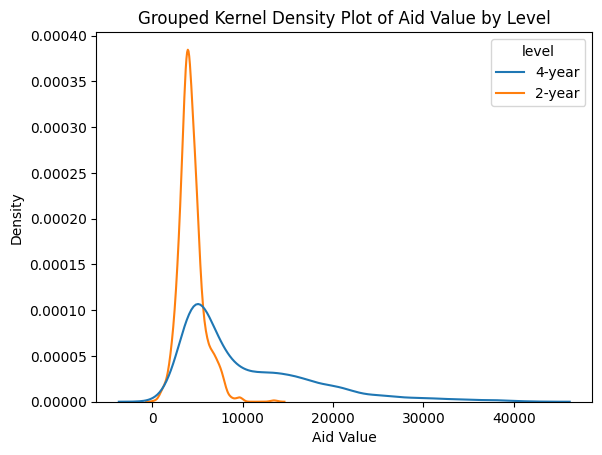

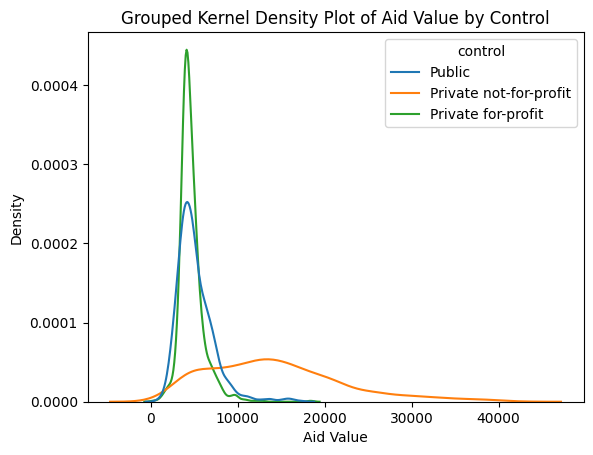

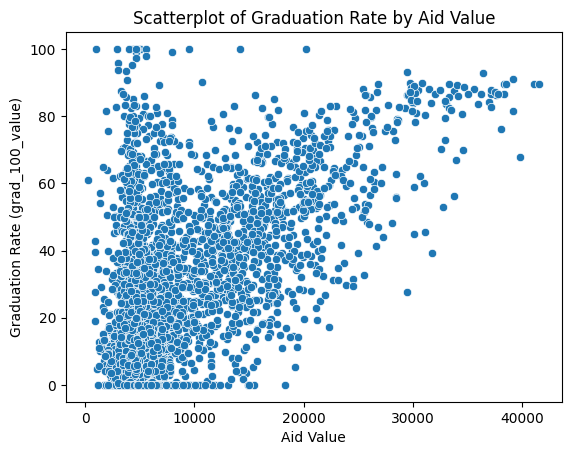

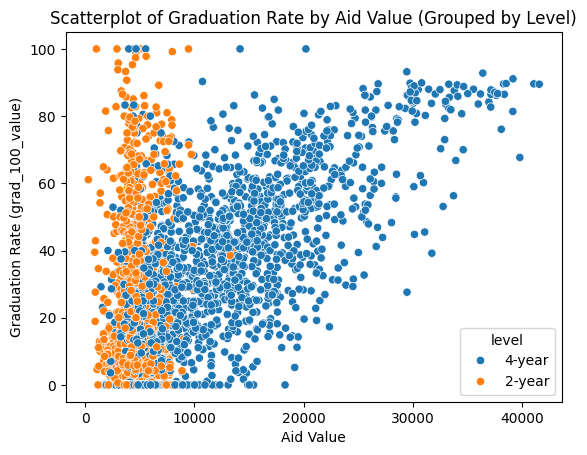

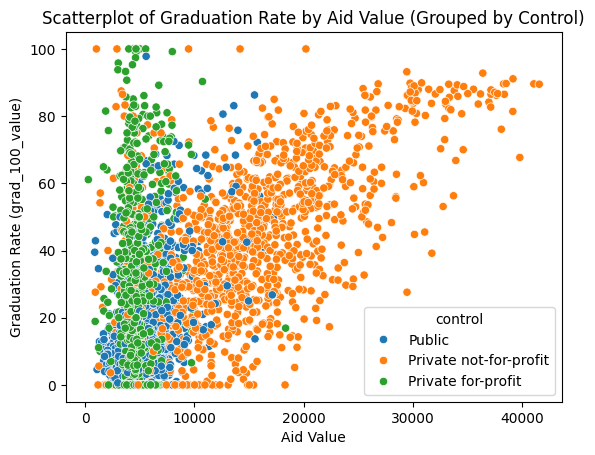

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')
df.head()
# Create the cross-tabulation
cross_tab = pd.crosstab(df['level'], df['control'])

# Display the cross-tabulation
print(cross_tab)
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['grad_100_value'], bins=20)
plt.xlabel("Graduation Rate (grad_100_value)")
plt.ylabel("Frequency")
plt.title("Histogram of Graduation Rates")
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['grad_100_value'])
plt.xlabel("Graduation Rate (grad_100_value)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rates")
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['grad_100_value'])
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Boxplot of Graduation Rates")
plt.show()

print(df['grad_100_value'].describe())
grouped_stats = df.groupby(['level', 'control'])['grad_100_value'].describe()

# Display the results
print(grouped_stats)

# Create the interaction variable
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# Grouped kernel density plot

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)

plt.xlabel("Graduation Rate (grad_100_value)")
plt.ylabel("Density")
plt.title("Grouped Kernel Density Plot of Graduation Rates by Level and Control")

# Force legend to show unique categories
plt.legend(title="Level, Control", bbox_to_anchor=(1.05, 1), loc='upper left', labels=df['levelXcontrol'].unique())
plt.show()

# Grouped kernel density plot by level and control
sns.kdeplot(data=df, x='aid_value', hue='level', common_norm=False)  # Group by level
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.title("Grouped Kernel Density Plot of Aid Value by Level")
plt.show()

sns.kdeplot(data=df, x='aid_value', hue='control', common_norm=False)  # Group by control
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.title("Grouped Kernel Density Plot of Aid Value by Control")
plt.show()

# Scatterplot
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Scatterplot of Graduation Rate by Aid Value")
plt.show()
# Grouped scatterplot by level
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Scatterplot of Graduation Rate by Aid Value (Grouped by Level)")
plt.show()

# Grouped scatterplot by control
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Scatterplot of Graduation Rate by Aid Value (Grouped by Control)")
plt.show()
